In [1]:
from symbulate import *
%matplotlib inline

In [2]:
M, R = RV(BivariateNormal(mean1=635, mean2=595, sd1=85, sd2=70, corr=0.6))

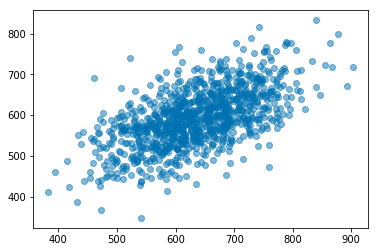

In [3]:
(M & R).sim(1000).plot()

ValueError: invalid literal for int() with base 10: ''

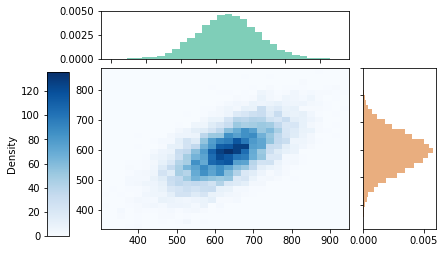

In [3]:
(M & R).sim(10000).plot(['hist', 'marginal'])

0.2263

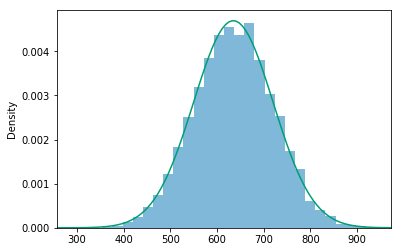

In [5]:
m = M.sim(10000)
m.plot()
Normal(635, 85).plot()
m.count_gt(700) / 10000

(1231.130761718158, 137.5188127623411, 0.0258)

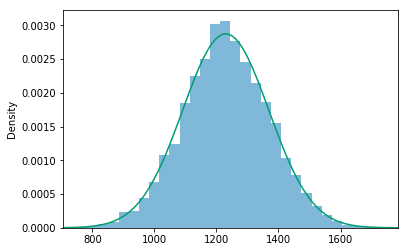

In [6]:
s = (M + R).sim(10000)
s.plot()
Normal(635+595, var=85**2 + 70**2 +2*0.6*85*70).plot()
s.mean(), s.sd(), s.count_gt(1500) / 10000

In [7]:
85*sqrt(1-0.6**2)

68.0

(711.6444344205383, 67.8385129216532, 0.5754)

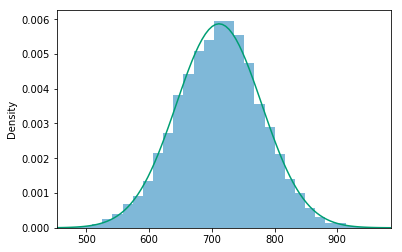

In [8]:
m_given_R_eq_700 = (M | (abs(R - 700) < 5) ).sim(10000)
m_given_R_eq_700.plot()
Normal(635+0.6*85*(700-595)/70, 85*sqrt(1-0.6**2)).plot()
m_given_R_eq_700.mean(), m_given_R_eq_700.sd(), m_given_R_eq_700.count_gt(700) / 10000

(39.745500507509746, 70.76467842515062, 0.713)

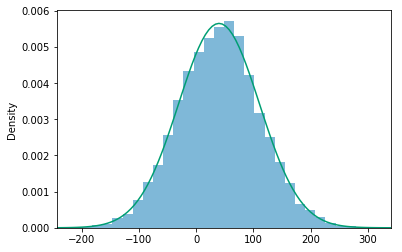

In [9]:
d = (M - R).sim(10000)
d.plot()
Normal(635-595, var=85**2 + 70**2 -2*0.6*85*70).plot()
d.mean(), d.sd(), d.count_gt(0) / 10000

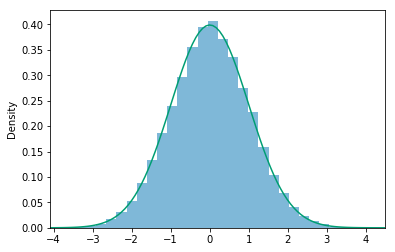

In [10]:
X, I = RV(Normal(0, 1) * BoxModel([-1, 1]))
Y = I * X
Y.sim(10000).plot()
Normal(0, 1).plot()

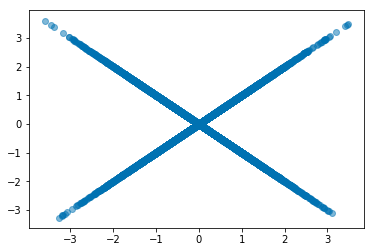

In [11]:
(X & Y).sim(10000).plot()

In [12]:
(X & Y).sim(10000).cov()

-0.016302446994200723

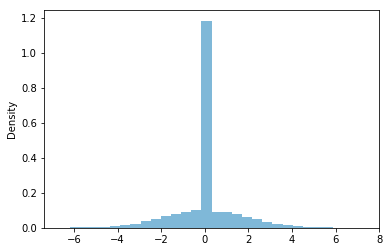

In [13]:
(X + Y).sim(10000).plot()

In [14]:
(X + Y).sim(10000).count_eq(0) / 10000

0.4989

In [15]:
P = GaussianProcessProbabilitySpace(mean_func=lambda t: 0,
                                   cov_func=lambda s, t: 25 * exp(-0.5 * abs(t - s)))
X = RV(P)

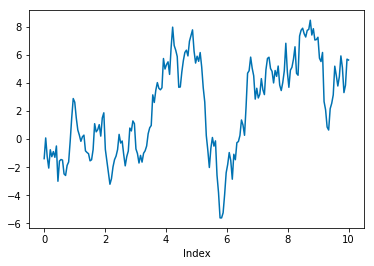

In [21]:
X.sim(1).plot()

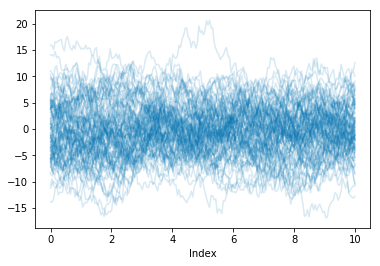

In [22]:
X.sim(100).plot()

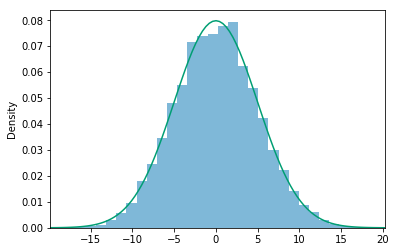

In [19]:
X[1].sim(10000).plot()
Normal(0, var=25).plot()

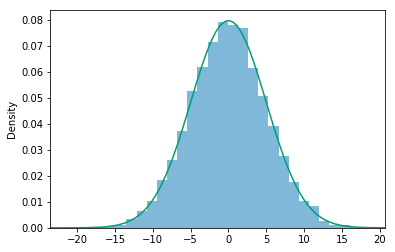

In [20]:
X[1.1].sim(10000).plot()
Normal(0, var=25).plot()

(23.419556462012313, 0.95090835058934187)

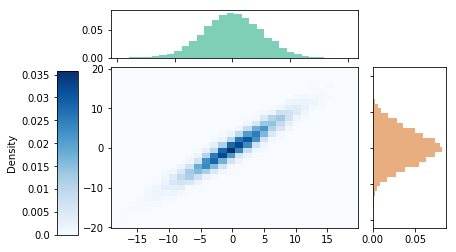

In [25]:
xy = (X[1] & X[1.1]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(23.78758742720478, 0.9519451559474239)

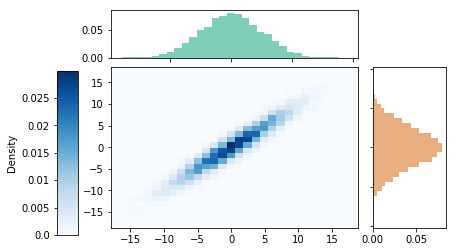

In [26]:
xy = (X[1.8] & X[1.9]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(16.145816480375466, 0.64113239840954761)

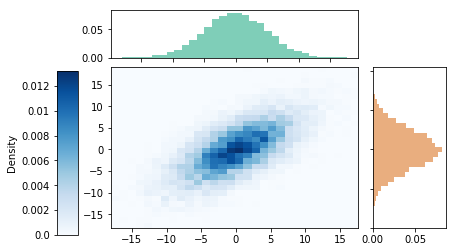

In [27]:
xy = (X[1.0] & X[1.9]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

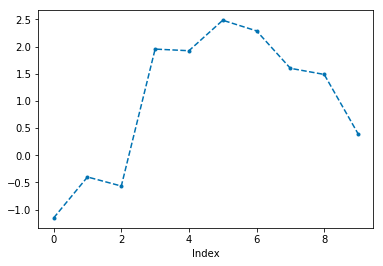

In [30]:
P = Normal(0, 1) ** inf
Z = RV(P)
X = RandomProcess(P)
X[0] = Z[0]
for n in range(100):
    X[n + 1] = 0.5 * X[n] + Z[n + 1]
    
X.sim(1).plot()

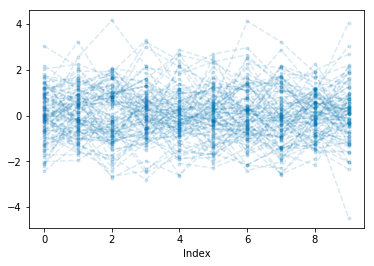

In [31]:
X.sim(100).plot()

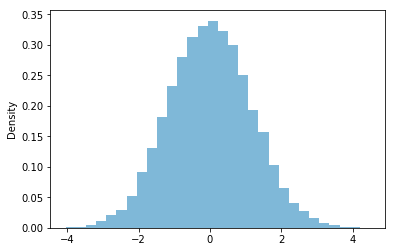

In [33]:
X[3].sim(10000).plot()

(0.6709439014417965, 0.50082121773668531)

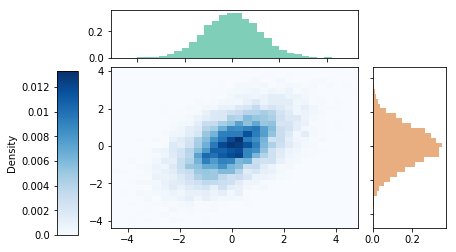

In [34]:
xy = (X[3] & X[4]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(0.32736640754525403, 0.24401211366101808)

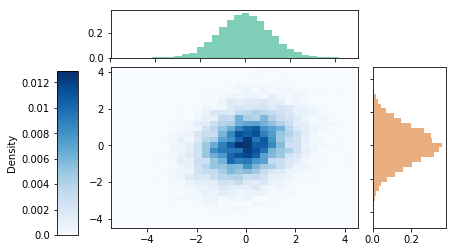

In [35]:
xy = (X[3] & X[5]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(0.15776376878141157, 0.11828233434005472)

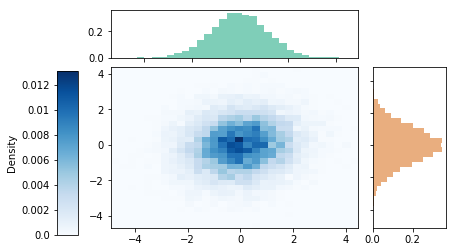

In [36]:
xy = (X[3] & X[6]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()